<a href="https://colab.research.google.com/github/naqi72/Finetuning_TTS_Model/blob/main/Hindi_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Nov  5 09:06:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install datasets soundfile speechbrain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 33.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 

In [3]:
!pip install --upgrade accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [4]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [7]:
from huggingface_hub import notebook_login

notebook_login()

In [8]:
from datasets import load_dataset, Audio

dataset = load_dataset("mozilla-foundation/common_voice_17_0", "hi", split='train')


The repository for mozilla-foundation/common_voice_17_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_17_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


n_shards.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

hi_train_0.tar:   0%|          | 0.00/124M [00:00<?, ?B/s]

hi_dev_0.tar:   0%|          | 0.00/70.1M [00:00<?, ?B/s]

hi_test_0.tar:   0%|          | 0.00/102M [00:00<?, ?B/s]

hi_other_0.tar:   0%|          | 0.00/140M [00:00<?, ?B/s]

hi_invalidated_0.tar:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

hi_validated_0.tar:   0%|          | 0.00/298M [00:00<?, ?B/s]

transcript/hi/train.tsv:   0%|          | 0.00/1.76M [00:00<?, ?B/s]

transcript/hi/dev.tsv:   0%|          | 0.00/882k [00:00<?, ?B/s]

transcript/hi/test.tsv:   0%|          | 0.00/1.13M [00:00<?, ?B/s]

transcript/hi/other.tsv:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

transcript/hi/invalidated.tsv:   0%|          | 0.00/288k [00:00<?, ?B/s]

transcript/hi/validated.tsv:   0%|          | 0.00/3.79M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 4689it [00:00, 55987.89it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2428it [00:00, 62951.38it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3154it [00:00, 69747.32it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 4044it [00:00, 121897.30it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 775it [00:00, 45521.95it/s]


Generating validated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10329it [00:00, 92605.86it/s]


In [9]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))


In [10]:
tokenizer = processor.tokenizer


In [11]:
def extract_all_chars(batch):
    all_text = " ".join(batch["sentence"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}


Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

In [12]:
dataset_vocab - tokenizer_vocab


{' ',
 '&',
 '|',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ए',
 'ऐ',
 'ऑ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ो',
 'ौ',
 '्',
 'क़',
 'ज़',
 'ड़',
 'ढ़',
 'फ़',
 '।',
 '‘',
 '’',
 '“',
 '”'}

In [13]:
replacements = [
    (' ', ' '),      # Space
    ('&', 'and'),    # Ampersand
    ('|', 'or'),     # Vertical bar
    ('ँ', 'n'),      # Chandrabindu, nasal sound
    ('ं', 'n'),      # Anusvara, nasal sound
    ('ः', 'h'),      # Visarga, breathy 'h'
    ('अ', 'a'),      # A
    ('आ', 'aa'),     # AA
    ('इ', 'i'),      # I
    ('ई', 'ii'),     # II
    ('उ', 'u'),      # U
    ('ऊ', 'uu'),     # UU
    ('ऋ', 'ri'),     # Vocalic R
    ('ए', 'e'),      # E
    ('ऐ', 'ai'),     # AI
    ('ऑ', 'o'),      # O (as in dog)
    ('ओ', 'o'),      # O
    ('औ', 'au'),     # AU
    ('क', 'k'),      # Ka
    ('ख', 'kh'),     # Kha
    ('ग', 'g'),      # Ga
    ('घ', 'gh'),     # Gha
    ('च', 'ch'),     # Cha
    ('छ', 'chh'),    # Chha
    ('ज', 'j'),      # Ja
    ('झ', 'jh'),     # Jha
    ('ञ', 'ny'),     # Nya
    ('ट', 't'),      # Retroflex T
    ('ठ', 'th'),     # Retroflex Th
    ('ड', 'd'),      # Retroflex D
    ('ढ', 'dh'),     # Retroflex Dh
    ('ण', 'n'),      # Retroflex N
    ('त', 't'),      # Dental T
    ('थ', 'th'),     # Dental Th
    ('द', 'd'),      # Dental D
    ('ध', 'dh'),     # Dental Dh
    ('न', 'n'),      # Dental N
    ('प', 'p'),      # Pa
    ('फ', 'ph'),     # Pha
    ('ब', 'b'),      # Ba
    ('भ', 'bh'),     # Bha
    ('म', 'm'),      # Ma
    ('य', 'y'),      # Ya
    ('र', 'r'),      # Ra
    ('ल', 'l'),      # La
    ('व', 'v'),      # Va
    ('श', 'sh'),     # Sha
    ('ष', 'sh'),     # Retroflex Sha
    ('स', 's'),      # Sa
    ('ह', 'h'),      # Ha
    ('़', ''),       # Nukta (softens the sound)
    ('ा', 'aa'),     # Long A
    ('ि', 'i'),      # Short I
    ('ी', 'ii'),     # Long I
    ('ु', 'u'),      # Short U
    ('ू', 'uu'),     # Long U
    ('ृ', 'ri'),     # Vocalic R
    ('ॅ', 'e'),      # Short E
    ('े', 'e'),      # E
    ('ै', 'ai'),     # AI
    ('ॉ', 'o'),      # Short O
    ('ो', 'o'),      # O
    ('ौ', 'au'),     # AU
    ('्', ''),       # Virama (removes inherent vowel)
    ('क़', 'q'),      # Qa
    ('ज़', 'z'),      # Za
    ('ड़', 'r'),      # Dda
    ('ढ़', 'rh'),     # Dhha
    ('फ़', 'f'),      # Fa
    ('।', '.'),      # Full stop (Danda)
    ('‘', "'"),      # Left single quote
    ('’', "'"),      # Right single quote
    ('“', '"'),      # Left double quote
    ('”', '"'),      # Right double quote
]

# Function to clean up Hindi text
def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["sentence"] = inputs["sentence"].replace(src, dst)
    return inputs

# Example of applying the cleanup to a dataset
dataset = dataset.map(cleanup_text)


Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

In [14]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

<ipython-input-14-9f95de381175>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [15]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["sentence"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example


In [16]:
processed_example = prepare_dataset(dataset[0])


In [17]:
list(processed_example.keys())


['input_ids', 'labels', 'speaker_embeddings']

In [18]:
tokenizer.decode(processed_example["input_ids"])


'hmne uskaa jnmdin mnaayaa.</s>'

In [19]:
processed_example["speaker_embeddings"].shape


(512,)

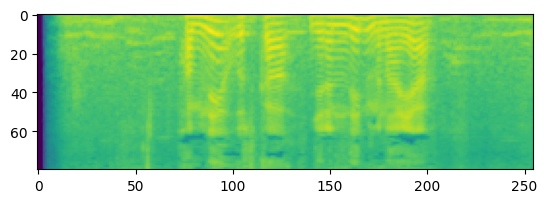

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()


In [21]:

from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [22]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)


In [23]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)


In [24]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)


Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

In [25]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/4689 [00:00<?, ? examples/s]

In [26]:
dataset = dataset.train_test_split(test_size=0.1)



In [27]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [28]:
data_collator = TTSDataCollatorWithPadding(processor=processor)


In [29]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)


In [30]:
{k:v.shape for k,v in batch.items()}


{'input_ids': torch.Size([3, 77]),
 'attention_mask': torch.Size([3, 77]),
 'labels': torch.Size([3, 396, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

In [31]:
model.config.use_cache = False


In [40]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_voxpopuli_hindi",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)


In [41]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)


max_steps is given, it will override any value given in num_train_epochs


In [42]:
trainer.train()


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss,Validation Loss
1000,0.465900,0.443765
2000,0.453400,0.431391
3000,0.448200,0.429993


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/e

Step,Training Loss,Validation Loss
1000,0.465900,0.443765
2000,0.453400,0.431391
3000,0.448200,0.429993
4000,0.433000,0.430426


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.


TrainOutput(global_step=4000, training_loss=0.4654578673839569, metrics={'train_runtime': 8014.203, 'train_samples_per_second': 31.943, 'train_steps_per_second': 0.499, 'total_flos': 1.9036395690513696e+16, 'train_loss': 0.4654578673839569, 'epoch': 60.60606060606061})

In [43]:
kwargs = {
    "dataset_tags": "mozilla-foundation/common_voice_11_0",
    "dataset": "common_voice_11_0",
    "dataset_args": "config: hi, split: train",
    "language": "hi",
    "model_name": "SpeechT5 TTS hindi",
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
    "tags": ["text-to-speech"],
}

In [44]:
trainer.push_to_hub(**kwargs)


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.


events.out.tfevents.1730799772.c657a55be231.359.1:   0%|          | 0.00/41.8k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/naqi72/speecht5_tts_voxpopuli_hindi/commit/9a490e2a0c48ca45c86dad0ca5b9ce8783b9da0b', commit_message='End of training', commit_description='', oid='9a490e2a0c48ca45c86dad0ca5b9ce8783b9da0b', pr_url=None, pr_revision=None, pr_num=None)

In [45]:
model = SpeechT5ForTextToSpeech.from_pretrained("naqi72/speecht5_tts_voxpopuli_hindi")


config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

In [46]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

In [65]:
text="Ummeedvaar ne samjhaya ki CUDA GPU pradarshan ko kaise badhata hai aur OAuth API access ko kaise surakshit karta hai."

In [66]:
inputs = processor.tokenizer(text, return_tensors="pt")


In [67]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)


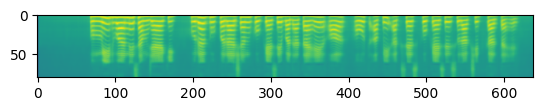

In [68]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()


In [69]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")


In [70]:
with torch.no_grad():
    speech = vocoder(spectrogram)


In [71]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)


In [72]:
import soundfile as sf
from google.colab import files

sf.write("output.wav", speech.numpy(), samplerate=16000)
files.download('output.wav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
import time
start_time = time.time()

# Run inference
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

# Stop the timer
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

Inference Time: 0.0016 seconds
